In [240]:
%matplotlib notebook
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import itertools, inspect
import math, os
import museuq
import scipy.io as spio


In [5]:
print(os.getcwd())

/Users/jinsongliu/BoxSync/MUSELab/museuq/examples/JupyterNotebook


(4095,)


<IPython.core.display.Javascript object>


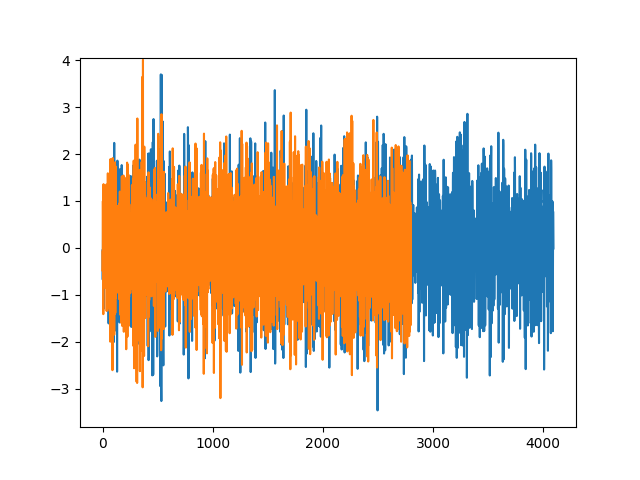

In [8]:
eta = np.load('eta.npy')
print(eta.shape)
fig = plt.figure()
plt.plot(eta)



In [162]:
def jonswap(w, Hs, Tp):
    """ JONSWAP wave spectrum, IEC 61400-3
    w: frequencies to be sampled at, hz 
    Hs: significant wave height, m
    Tp: wave peak period, sec
    """

    with np.errstate(divide='ignore'):
        # print "sample frequency: \n", w
        wp    = 2*np.pi/Tp
        gamma = 3.3 
        sigma = 0.07 * np.ones(w.shape)
        sigma[w > wp] = 0.09
        # print "wp:", wp
        # print "sigma: ", sigma
        
        assert w[0] >= 0 ,'Single side power spectrum start with frequency greater or eqaul to 0, w[0]={:4.2f}'.format(w[0])

        JS1 = 5/16 * Hs**2 * wp**4 * w**-5
        JS2 = np.exp(-1.25*(w/wp)**-4) * (1-0.287*np.log(gamma))
        JS3 = gamma**(np.exp(-0.5*((w-wp)/sigma/wp)**2))

        JS1[np.isinf(JS1)] = 0
        JS2[np.isinf(JS2)] = 0
        JS3[np.isinf(JS3)] = 0
        # print(np.isnan(JS1).any())
        JS = JS1 * JS2 * JS3

    return w, JS



In [10]:
np.std(eta)*4

3.944211682840733

(1401,)
(1401,)
0.001
1201
200 1400


<IPython.core.display.Javascript object>


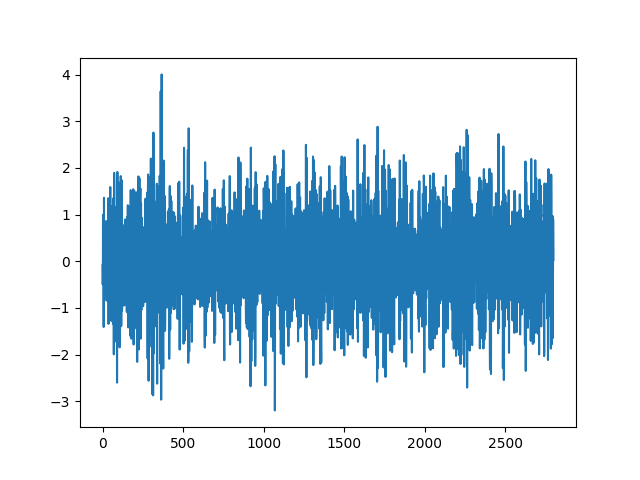

2801
[-0.07780181 -0.49463265 -0.36979813  0.99629016  0.26814638]
0.9857543615701938
4*std: 3.943017446280775


In [58]:
# signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
# fourier = np.fft.fft(signal)
# n = signal.size
# timestep = 0.1
# freq = np.fft.fftfreq(n, d=timestep)
# print(freq)
# freq = np.fft.fftfreq(n, d=1)
# print(freq)
Hs, Tp = 2.8,13.2
np.random.seed(100)
env = museuq.Environment('JONSWAP')
x   = [2.8,13.4]
dw  = 0.001

w   = np.linspace(0,1.4, num=int(round(1.4/dw)+1))
print(w.shape)

w_rad   = np.linspace(0.2, 1.4,1201)
_, pxx  = jonswap(w_rad, Hs, Tp)
A       = np.zeros(np.size(w), dtype=complex)
print(A.shape)
print(dw)
theta   = stats.uniform.rvs(-np.pi, 2*np.pi, size=np.size(w_rad))
env_c1  = np.sqrt(dw * pxx) * np.exp(1j*theta) 

print(len(env_c1))
# print(np.amax(theta), np.amin(theta))
idx1 = np.where(w==w_rad[0])[0][0]
idx2 = np.where(w==w_rad[-1])[0][0]
print(idx1, idx2)
A[idx1:idx2+1] = env_c1

A_conj  = np.conj(A)
A       = np.append(A, np.flip(A_conj[1:]))
eta     = np.fft.ifft(A).real * np.size(A)
fig = plt.figure()
plt.plot(eta)


# np.save(os.path.join(data_dir, 'eta'), eta)
print(np.size(eta))
print(eta[:5])
print(np.std(eta))
sigma = np.std(eta)
print('4*std: {}'.format(4 * sigma))



# Re, Im  = stats.norm.rvs(0,1, size=(2, np.size(w_rad)))
# env_c   = np.sqrt(spectrum.dw * spectrum.pxx)/2.0 * (Re + 1j*Im)
# A[int(w_rad[0]/dw):int(w_rad[-1]/dw)] = env_c
# A_conj  = np.conj(A)
# A       = np.append(A, np.flip(A_conj[1:]))

# eta = np.fft.ifft(A).real * np.size(A)
# print(np.size(eta))
# print(eta[:5])
# print(np.std(eta))
# sigma = np.std(eta)
# print('4*std: {}'.format(4 * sigma))


t:[0.0,100.0], dt=0.01, size=10001


<IPython.core.display.Javascript object>


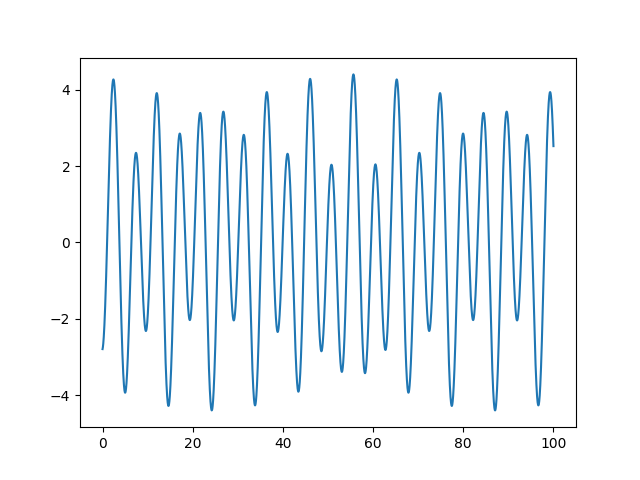

In [91]:
a1, a2 = 1.2, 3.2
w1, w2 = 0.7, 1.3
theta1, theta2 = -1.234,3.067
tmin, tmax, dt = 0, 100, 0.01
t = np.linspace(tmin, tmax, int(round((tmax-tmin)/dt)+1))
print('t:[{},{}], dt={}, size={}'.format(t[0],t[-1], t[1]-t[0], t.size))
eta = a1*np.cos(w1*t + theta1) + a2 * np.cos(w2*t + theta2)
fig = plt.figure()
plt.plot(t, eta)

0.0 0.00999900009999 49.99500049995 -49.99500049995


<IPython.core.display.Javascript object>


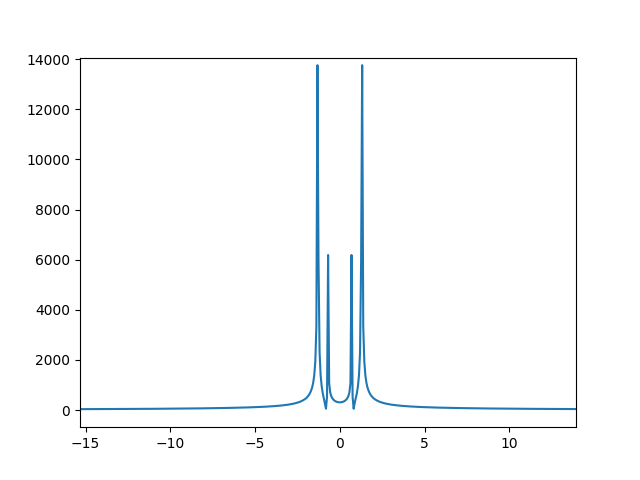

<IPython.core.display.Javascript object>


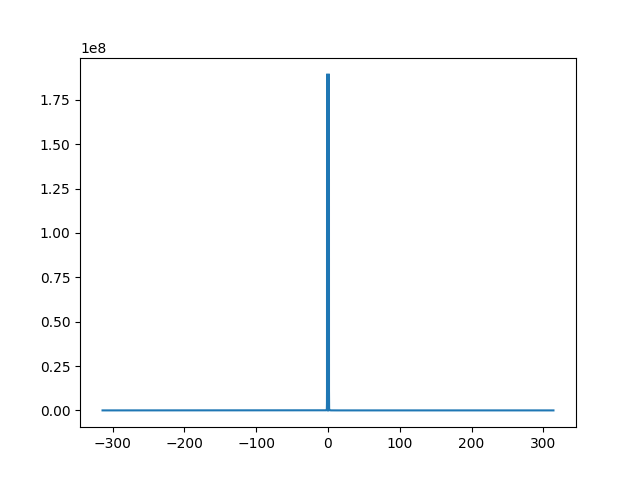

In [97]:
fft_eta  = np.fft.fft(eta)
fft_freq = np.fft.fftfreq(eta.size, dt)
print(fft_freq[0],fft_freq[1]-fft_freq[0], max(fft_freq), min(fft_freq))
fft_omega= 2 * np.pi * fft_freq

fft_eta  = np.fft.fftshift(fft_eta)
fft_omega = np.fft.fftshift(fft_omega)

fig = plt.figure()
plt.plot(fft_omega, np.abs(fft_eta))

fig = plt.figure()
plt.plot(fft_omega, np.abs(fft_eta)**2)

<IPython.core.display.Javascript object>


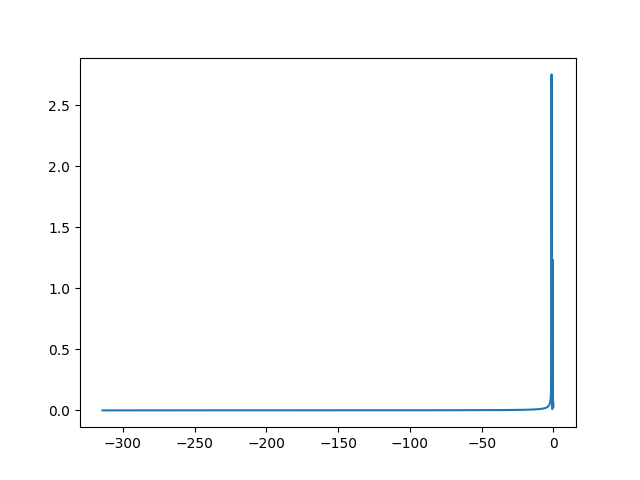

In [98]:
P2 = np.abs(fft_eta/eta.size)
P1 = P2[:eta.size//2+1]
P1[1:-1] = 2*P1[1:-1]
fig = plt.figure()
plt.plot(fft_omega[:eta.size//2+1], P1)

In [157]:
print(w[33:40])
print(w[0],w[-1],w[1]-w[0],w.size)
print(w1)
print(np.where(w[33:40]==w1))
print(int(round(w1/dw)))
print(int(round(w2/dw)))

[0.66 0.68 0.7  0.72 0.74 0.76 0.78]
0.0 157.08 0.02 7855
0.7
(array([], dtype=int64),)
35
65


In [159]:
tmin, tmax, dt = 0, 100, 0.01
dw = 0.02
wmin,wmax = 0,np.pi/dt
a1, a2 = 1.2, 3.2
w1, w2 = 0.7, 1.3
theta1, theta2 = -1.234,3.067
# w  = np.linspace(wmin,wmax,int(round(wmax/dw)+1))
w  = np.arange(int(round(wmax/dw)+1)) * dw
A  = np.zeros(np.size(w), dtype=complex)
print(int(round(w1/dw)))
print(int(round(w2/dw)))
A[int(round(w1/dw))] = a1/2 * np.exp(-1j*theta1)*w.size*2
A[int(round(w2/dw))] = a2/2 * np.exp(-1j*theta2)*w.size*2
A_conj = np.conj(A)
fft_f  = np.append(A,np.flip(A_conj[1:]))
eta = np.fft.ifft(fft_f)
T = 2*np.pi/dw
t = np.arange(0, int(round(T/dt)+1))*dt

print(fft_f.size)
print(t.size)

35
65
31417
31417


<IPython.core.display.Javascript object>


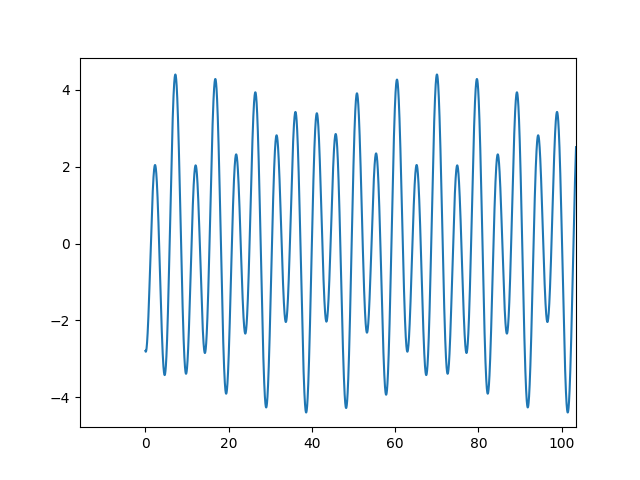

In [161]:
fig = plt.figure()
plt.plot(t,eta)

In [223]:
Hs, Tp = 3.7422, 10.4837
np.random.seed(100)
tmin, tmax, dt = 0, 4000, 0.01
t   = np.arange(int(round(tmax/dt))+1) * dt
dw  = 0.00125  # rad/s
wmin, wmax = 0.0, 4 # rad/s
w = np.arange(int(wmax/dw))*dw
print(w[0],w[-1],w.size)

fft_freq_min, fft_freq_max, fft_freq_dw = 0, np.pi/dt, dw
fft_freq = np.arange(int(round(fft_freq_max/fft_freq_dw)+1)) * fft_freq_dw
print(fft_freq[0],fft_freq[-1],fft_freq[1]-fft_freq[0],fft_freq.size)
fft_A = np.zeros(fft_freq.size, dtype=complex)
w_    = np.arange(int(wmin/dw),int(wmax/dw))*dw
print(w_.size)

_,pxx = jonswap(w_, Hs, Tp)
theta = stats.uniform.rvs(-np.pi, 2*np.pi, w_.size)
A = np.sqrt(2*pxx*dw)/2 * np.exp(-1j*theta) * (fft_freq.size* 2-1)
fft_A[int(wmin/dw):int(wmax/dw)] = A

fft_A = np.append(fft_A, np.flip(np.conj(fft_A[1:])))
eta = np.fft.ifft(fft_A)
t = np.arange(0, int(round(2*np.pi/dw/dt))) * dt
print(t.size)
print(eta.size)
print(type(eta[0]))

0.0 3.9987500000000002 3200
0.0 314.15875 0.00125 251328
3200
502655
502655
<class 'numpy.complex128'>


In [224]:
np.std(eta) * 4

3.745943995129977

<IPython.core.display.Javascript object>


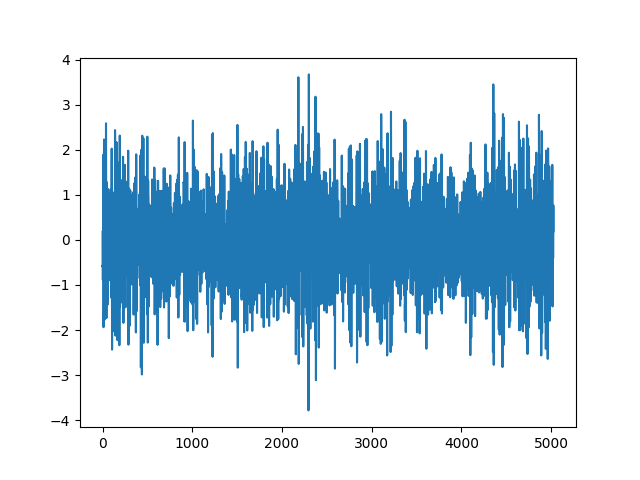

In [220]:
fig = plt.figure()
plt.plot(t, eta)

In [217]:
Hs, Tp = 3.7422, 10.4837
np.random.seed(100)
tmin, tmax, dt = 0, 4000, 0.01
t   = np.arange(int(round(tmax/dt))+1) * dt
dw  = 0.00125  # rad/s
wmin, wmax = 0.0, 4 # rad/s
w = np.arange(int(wmax/dw))*dw
print(w[0],w[-1],w.size)

fft_freq_min, fft_freq_max, fft_freq_dw = 0, np.pi/dt, dw
fft_freq = np.arange(int(round(fft_freq_max/fft_freq_dw)+1)) * fft_freq_dw
print(fft_freq[0],fft_freq[-1],fft_freq[1]-fft_freq[0],fft_freq.size)
fft_A = np.zeros(fft_freq.size, dtype=complex)
w_    = np.arange(int(wmin/dw),int(wmax/dw))*dw
print(w_.size)

_,pxx = jonswap(w_, Hs, Tp)
# theta = stats.uniform.rvs(-np.pi, 2*np.pi, w_.size)
Re, Im  = stats.norm.rvs(0,1, size=(2, w_.size))

A = np.sqrt(pxx*dw)/2 * (Re+1j*Im) * fft_freq.size* 2
fft_A[int(wmin/dw):int(wmax/dw)] = A

fft_A = np.append(fft_A, np.flip(np.conj(fft_A[1:])))
eta = np.fft.ifft(fft_A)
t = np.arange(0, int(round(2*np.pi/dw/dt))) * dt
print(t.size)
print(eta.size)
np.std(eta) * 4

0.0 3.9987500000000002 3200
0.0 314.15875 0.00125 251328
3200
502655
502655


4.074753434676269

In [237]:
a = np.arange(100)
b = np.array([3,6,10])
idx = np.where(a==101)
if idx[0].size > 0:
    print('yes')
else:
    print('empty')
print(idx)
print(idx[0])

empty
(array([], dtype=int64),)
[]


In [248]:
FPSO = spio.loadmat('/Users/jinsongliu/BoxSync/MUSELab/museuq/museuq/solver/FPSO.mat')
FPSO_RAO = FPSO['FPSO_RAO']
FPSO_ltf = FPSO['FPSO_ltf']
FPSO_qtf = FPSO['FPSO_qtf']
np.save('/Users/jinsongliu/BoxSync/MUSELab/museuq/museuq/solver/FPSO_RAO.npy',FPSO_RAO)
np.save('/Users/jinsongliu/BoxSync/MUSELab/museuq/museuq/solver/FPSO_ltf.npy',FPSO_ltf)
np.save('/Users/jinsongliu/BoxSync/MUSELab/museuq/museuq/solver/FPSO_qtf.npy',FPSO_qtf)